###### POLYNOMIAL REGRESSION

###### IMPORTING AND LOADING DATA

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
boston_data = load_boston()
data = pd.DataFrame(data = boston_data["data"],
                   columns = boston_data["feature_names"])

In [7]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [5]:
Y = pd.DataFrame(boston_data["target"], columns = ["Price in $1000s"])

In [9]:
Y.head(20)

,Price in $1000s
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


###### Polynomial Regression, 1 variable with 2 degrees

In [11]:
# Remember that for 1 variable we have to reshape it.
X = data["LSTAT"].values.reshape((-1,1))

print(pd.DataFrame(data["LSTAT"].values.reshape((-1,1))))

baseline_model = LinearRegression()
baseline_model.fit(X, Y)

LinearRegression()

In [12]:
print("The model explains {:.2f}% of the average price.".format(baseline_model.score(X,Y)*100))

The model explains 54.41% of the average price.


###### POLYNOMIAL REGRESSION

In [18]:
# Store the SQUARED VALUES in a new Column in the DataFrame
data["LSTAT2"] = data["LSTAT"] ** 2

In [19]:
# Now as X we will pick these TWO VARIABLES
X = data[["LSTAT", "LSTAT2"]]
X.head()

,LSTAT,LSTAT2
0,4.98,24.8004
1,9.14,83.5396
2,4.03,16.2409
3,2.94,8.6436
4,5.33,28.4089


In [20]:
# Everything here should also look familiar
polynomial_model = LinearRegression()
polynomial_model.fit(X, Y)

print("The model explains {:.2f}% of the average price.".format(polynomial_model.score(X,Y) * 100))

The model explains 64.07% of the average price.


###### Visualizing the POLYNOMIAL MODEL

In [21]:
a = polynomial_model.coef_
b = polynomial_model.intercept_

# note that coef is an array of values, not just 1 value
a

array([[-2.3328211 ,  0.04354689]])

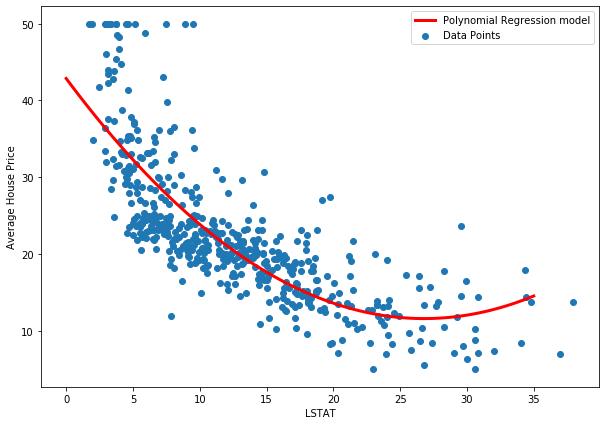

In [22]:
plt.figure(figsize=(10,7))

# We do not need to plot against LSTAT2, just LSTAT
plt.scatter(data["LSTAT"], Y, label = "Data Points")

# Now we have 2 variables, and the second is the squared version of the first...
linearly_spaced_data_X1 = np.linspace(0, 35, 100)
linearly_spaced_data_X2 = linearly_spaced_data_X1 ** 2

# The @ symbol performs matrix multiplication it is a shortcut for multiplying each coefficient with the respective X column(variable)
linearly_spaced_data_Y = a @ (linearly_spaced_data_X1, linearly_spaced_data_X2) + b

plt.plot(linearly_spaced_data_X1,
         linearly_spaced_data_Y.reshape((-1,)),
         color = 'red',
         lw = 3,
         label = "Polynomial Regression model")

# Some plotting parameters to make the plot look nicer
plt.xlabel("LSTAT")
plt.ylabel("Average House Price")
plt.legend();

###### Polynomial Regression, all variables, degree-2 polynomials

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
features = PolynomialFeatures(degree = 2)

In [25]:
X = features.fit_transform(data)
X.shape

(506, 120)

In [26]:
# Everything here should also look familiar
full_polynomial_model = LinearRegression()
full_polynomial_model.fit(X,Y)

print("The model explains {:.2f}% of the average price.".format(full_polynomial_model.score(X,Y)*100))

The model explains 93.14% of the average price.


###### VISUALIZATION

In [28]:
a = full_polynomial_model.coef_
b = full_polynomial_model.intercept_

predictions = a @ X.T + b

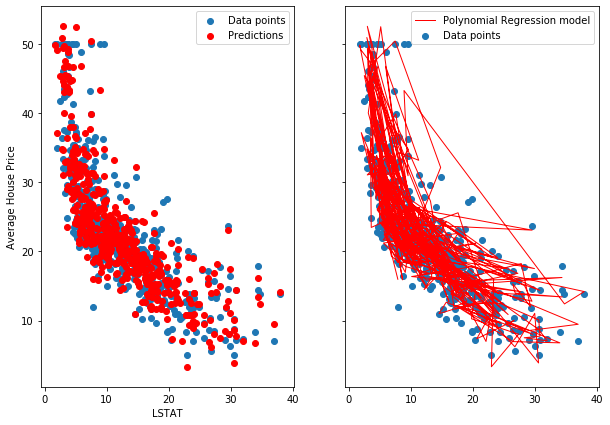

In [29]:
fig, (ax0, ax1) = plt.subplots(1, 
                               2,
                               figsize =(10, 7),
                               sharex = True,
                               sharey = True)

# We do not need to plot against LSTAT2, just LSTAT
ax0.scatter(data["LSTAT"], Y, label = "Data points")
ax1.scatter(data["LSTAT"], Y, label = "Data points")

ax0.scatter(data["LSTAT"],
            predictions.reshape((506,)),
            color = 'red',
            lw = 1,
            label = "Predictions")

ax1.plot(data["LSTAT"],
         predictions.reshape((506,)),
         color = 'red',
         lw = 1,
         label = "Polynomial Regression model")

# Some plotting parameters to make the plot look nicer
ax0.set_xlabel("LSTAT")
ax0.set_ylabel("Average House Price")
ax0.legend();
ax1.legend();

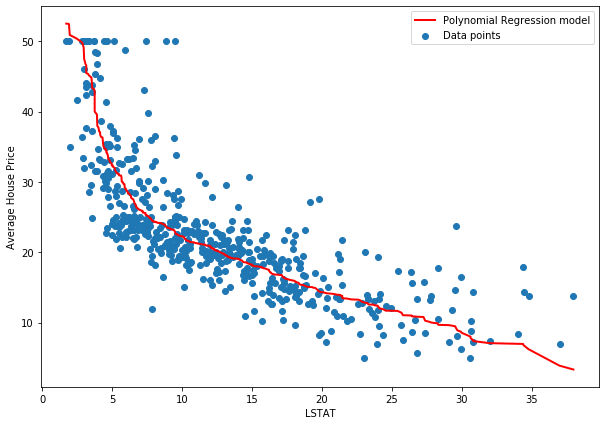

In [31]:
plt.figure(figsize = (10,7))

# We do not need to plot against LSTAT2, just LSTAT
plt.scatter(data["LSTAT"], 
            Y,
            label = "Data points")

# This is INCORRECT because it losses the real mapping from data to prediction,a but I believe it gives us a better picture of the model
plt.plot(sorted(data["LSTAT"]), 
         sorted(predictions.reshape((506,)),
                reverse = True),
         color = 'red', 
         lw = 2,
         label = "Polynomial Regression model")

# Some plotting parameters to make the plot look nicer
plt.xlabel("LSTAT")
plt.ylabel("Average House Price")
plt.legend();

###### HOW MANY DEGREES?

In [32]:
features = PolynomialFeatures(degree=3)
X = features.fit_transform(data)

X.shape

(506, 680)

In [33]:
overfit_polynomial_model = LinearRegression()
overfit_polynomial_model.fit(X,Y)

print("The model explains {:.2f}% of the average price.".format(overfit_polynomial_model.score(X,Y)*100))

The model explains 100.00% of the average price.


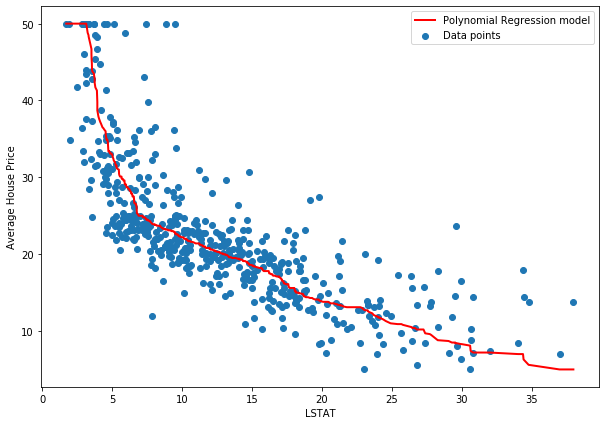

In [34]:
a = overfit_polynomial_model.coef_
b = overfit_polynomial_model.intercept_

predictions = a @ X.T + b

plt.figure(figsize = (10, 7))

plt.scatter(data["LSTAT"],
            Y,
            label = "Data points")

# again, the wrong method
plt.plot(sorted(data["LSTAT"]),
         sorted(predictions.reshape((506,)),
                reverse = True),
         color = 'red',
         lw = 2,
         label = "Polynomial Regression model")

plt.xlabel("LSTAT")
plt.ylabel("Average House Price")
plt.legend();